## Day 29 Lecture 1 Assignment

In this assignment, we will learn about decision trees. We will use the Chicago salary dataset loaded below.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
chicago = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Current_Employee_Names__Salaries__and_Position_Titles.csv')

In [0]:
chicago['Salary or Hourly'].shape

(32658,)

To simplify this problem, we will limit our model to only salary employees. Create a new dataset that does not contain any hourly employees.

In [0]:
# answer below:
chicago.info()
chicago['Annual Salary'] = pd.to_numeric(chicago['Annual Salary'].str.replace('$', ''))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32658 entries, 0 to 32657
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               32658 non-null  object 
 1   Job Titles         32658 non-null  object 
 2   Department         32658 non-null  object 
 3   Full or Part-Time  32658 non-null  object 
 4   Salary or Hourly   32658 non-null  object 
 5   Typical Hours      7883 non-null   float64
 6   Annual Salary      24775 non-null  object 
 7   Hourly Rate        7883 non-null   object 
dtypes: float64(1), object(7)
memory usage: 2.0+ MB


In [0]:
chicago['Salary or Hourly'] = np.where(chicago['Salary or Hourly'] == 'Salary', 0, 1)
chicago = chicago.loc[chicago['Salary or Hourly']==0]
chicago.shape


(24775, 8)

Next, we will look at the count of all values for both job titles and department to ensure that we don't use features that are too sparse in our model.

In [0]:
# answer below:
chicago.shape


(24775, 8)

Choose the between department and job title and use the variable with the smallest number of values to for one hot encoding. Additionally, create dummy variables for full ot part-time.

In [0]:
# answer below:
chicago = pd.concat([chicago,pd.get_dummies(chicago['Department'], prefix = 'Dept', drop_first= True)], axis = 1)
print(chicago.shape)



(24775, 43)


In [0]:
chicago['Full or Part-Time']= np.where(chicago['Full or Part-Time']=='Full',0,1)


Remove all irrelevant columns (Name, Job Titles, Salary or Hourly, Typical Hours, Hourly Rate)

In [0]:
# answer below:
chicago.drop(['Name', 'Job Titles', 'Salary or Hourly', 'Typical Hours', 'Hourly Rate', 'Department'], axis = 1,inplace = True)


Check that none of the remaining columns are of object type and convert them to numeric if they are of object type.

In [0]:
# answer 

chicago.dropna(inplace = True)
chicago.isnull().sum()
chicago.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24775 entries, 0 to 32657
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Full or Part-Time           24775 non-null  int64  
 1   Annual Salary               24775 non-null  float64
 2   Dept_ANIMAL CONTRL          24775 non-null  uint8  
 3   Dept_AVIATION               24775 non-null  uint8  
 4   Dept_BOARD OF ELECTION      24775 non-null  uint8  
 5   Dept_BOARD OF ETHICS        24775 non-null  uint8  
 6   Dept_BUDGET & MGMT          24775 non-null  uint8  
 7   Dept_BUILDINGS              24775 non-null  uint8  
 8   Dept_BUSINESS AFFAIRS       24775 non-null  uint8  
 9   Dept_CITY CLERK             24775 non-null  uint8  
 10  Dept_CITY COUNCIL           24775 non-null  uint8  
 11  Dept_COMMUNITY DEVELOPMENT  24775 non-null  uint8  
 12  Dept_COPA                   24775 non-null  uint8  
 13  Dept_CULTURAL AFFAIRS       247

Split the data into a test and train sample. Use annual salary as the dependent variable. 20% of the data should be assigned to the test sample.

In [0]:
# answer below:
from sklearn import tree
import pydotplus
import graphviz
from IPython.display import Image
from sklearn.model_selection import train_test_split
X = chicago.drop('Annual Salary', axis =1)
y = chicago['Annual Salary']
X_train, x_test, y_train, y_test = train_test_split(X,y)
X_train
y_train

9664      73440.0
27276     90024.0
32172     95484.0
17686    102816.0
12317     72510.0
           ...   
26257     93666.0
20500     89148.0
16240     73212.0
15502     92556.0
9012      90024.0
Name: Annual Salary, Length: 18581, dtype: float64

Generate a regession decision tree using `DecisionTreeRegressor` in sklearn. Fit the model on the training set and calculate the score for both train and test.

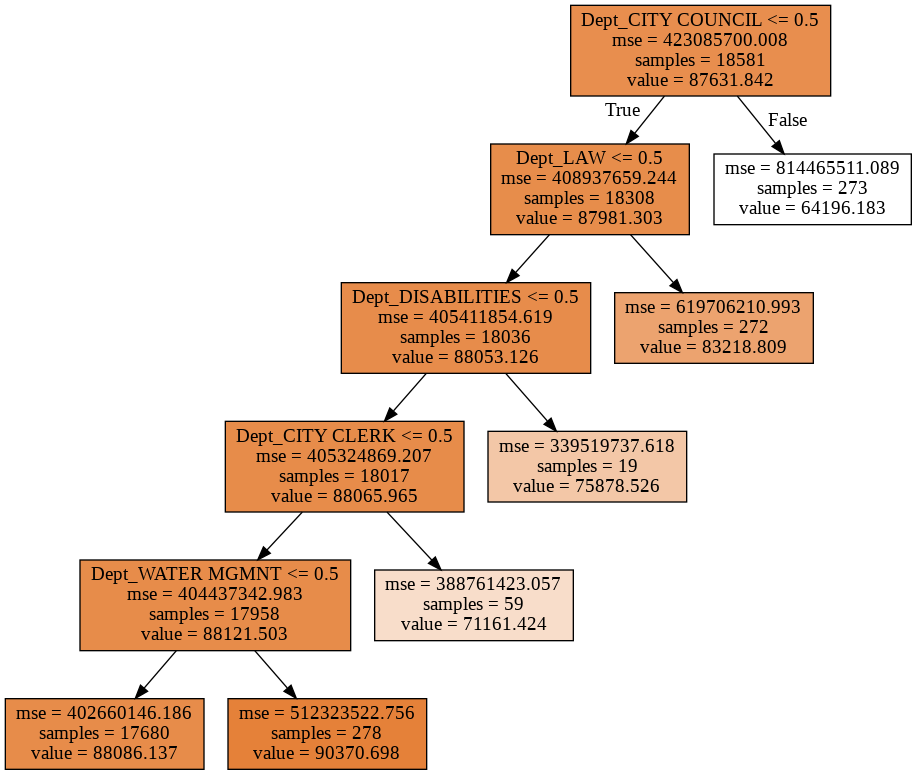

0.022846072478203028

In [0]:
# answer below:

decision_tree = tree.DecisionTreeRegressor(max_features=2, min_samples_split= 50, max_depth=5, random_state = 1337)
decision_tree.fit(X_train, y_train)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X_train.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))
decision_tree.score(X_train, y_train)